# 보스톤 주택가격 - ANN

In [161]:
import numpy as np

#무작위로 선형 데이터셋 생성
X = 2 * np.random.rand(100,1)  #rand: 난수 생성 함수
y = 4 +  3 * X + np.random.randn(100,1) #randn은 정규분포에 대한 난수 생성

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lin_reg.fit(X_train, y_train)

print(lin_reg.intercept_)  #편향(절편)
print(lin_reg.coef_)       #가중치
print(lin_reg.score(X_train, y_train)) #train set 점수
print(lin_reg.score(X_test, y_test)) #test set 점수

[3.83008835]
[[3.02187493]]
0.7777746808216854
0.7844207528952403


In [162]:
import pandas as pd

boston = pd.read_csv('./fly-AI/Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [164]:
boston.shape

(506, 14)

CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

In [168]:
# 범죄율, 주택당 방 수, 인구 중 하위 계층 비율, 노후 주택 비율과 주택가격과의 상관관계를 예측

from sklearn.model_selection import train_test_split

X = boston[['CRIM','RM', 'LSTAT', 'AGE']]
y = boston[['Target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
import matplotlib.pyplot as plt
%matplotlib inline

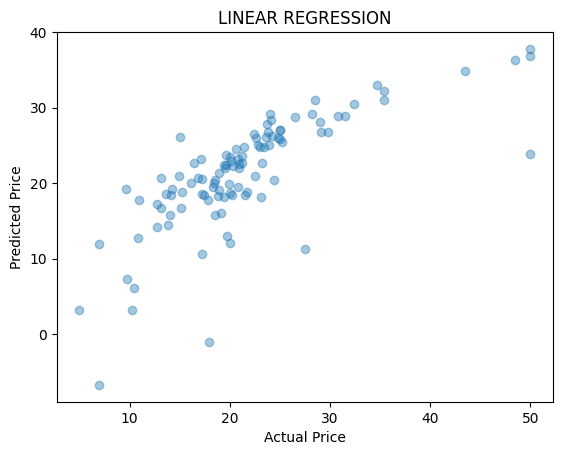

In [169]:
#실제 주택값과 예측한 주택값 간의 상관관계

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [142]:
reg.coef_

array([[-0.1298062 ,  5.45294513, -0.60480624,  0.0171971 ]])


coef_값을 구해보면 RM(주택당 방 수)의 가중치가 가장 높다. 이말은 즉 RM이 보스턴 주택가격에 미치는 영향이 가장 높다고 해석

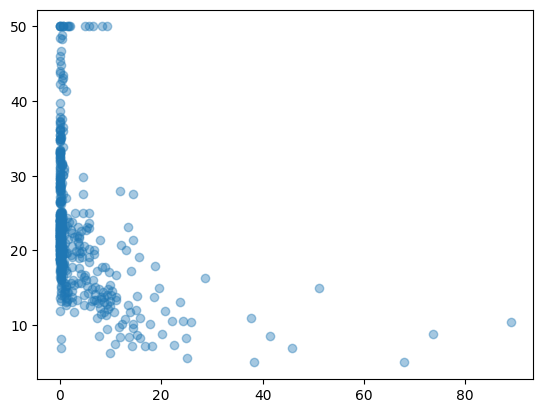

In [143]:
plt.scatter(boston[['CRIM']], boston[['Target']], alpha=0.4)
plt.show()

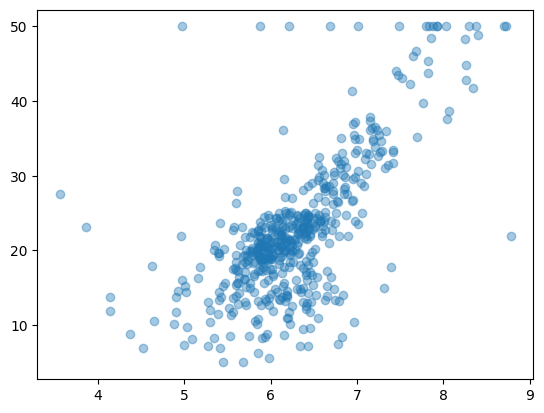

In [144]:
plt.scatter(boston[['RM']], boston[['Target']], alpha=0.4)
plt.show()

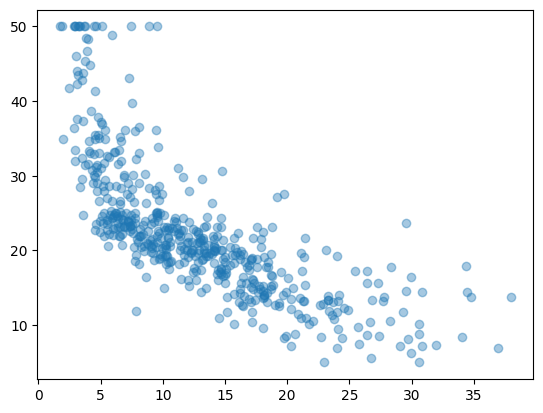

In [145]:
plt.scatter(boston[['LSTAT']], boston[['Target']], alpha=0.4)
plt.show()

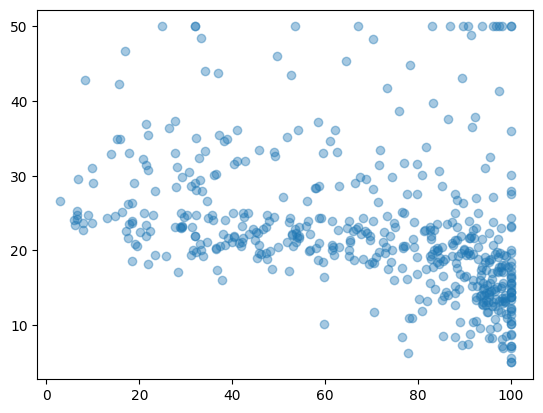

In [146]:
plt.scatter(boston[['AGE']], boston[['Target']], alpha=0.4)
plt.show()

In [147]:
# 범죄율과 노후 주택 수는 주택가격과 상관관계가 없어보이고, 방 개수가 가장 큰 양의 상관관계

reg.score(X_train, y_train) #train set R^2 점수
reg.score(X_test, y_test) #test set R^2 점수

0.5564675983574296